<img src="https://gitlab.com/Stiven77.nj/proyecto-ia-matriculas-de-vehiculos/-/raw/main/Banner_-_PROYECTO_IA.png"  width="800px" height="300px">


# <center> **Detección y reconocimiento de matrículas de vehículos** </center>

**Autores:** María Paula Rodriguez Jerez, Nicolas Stiven Jaimes Duarte, Helman Andres Merchan Quevedo

**Objetivo:** Clasificar imágenes de vehículos según si presentan matrículas o no, y extraer de una imagen la matrícula de un carro (en formato texto)

**Dataset:** https://drive.google.com/drive/folders/1cm7BmdCoGr1XTPwLZYMd7HTa6T-aDTLR?usp=sharing

**Modelos:** Gaussian NB, RandomForestClassifier, DecisionTreeClassifier, SuportVectorClassifier, Red Neuronal Profunda, Red Neuronal Convolucional

**Presentación:** https://www.canva.com/design/DAE6NEKnxaw/w9bG5S9ezHeRGeHJuZAj2w/view?utm_content=DAE6NEKnxaw&utm_campaign=designshare&utm_medium=link&utm_source=publishpresent

**Vídeo:** 





In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title **LIBRERIAS** { display-mode: "form" }
import cv2
import imageio
import numpy as np
import matplotlib.pyplot as plt
import torch 
import pandas as pd
import torch.utils.data as data
import torchvision.transforms as transforms
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import os
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut

## **Construcción del Dataset**

In [ ]:
# Obteniendo la carpeta de imagenes
matricula = "/content/drive/MyDrive/ImagenesDeVehiculos/Img/Carros_con_matricula"
no_matricula = "/content/drive/MyDrive/ImagenesDeVehiculos/Img/Carros_sin_matricula"

# Listar las imagenes de las carpetas anteriores
matricula_imgs = os.listdir(matricula) 
no_matricula_imgs = os.listdir(no_matricula)

# Cantidad de imagenes listadas
print("Cantidad de imagenes de autos con matricula: ", len(matricula_imgs), matricula_imgs)
print("Cantidad de imagenes de autos sin matricula: ", len(no_matricula_imgs), no_matricula_imgs)  

Cantidad de imagenes de autos con matricula:  500 ['ccm_132.jpg', 'ccm_133.jpeg', 'ccm_134.jpg', 'ccm_135.jpeg', 'ccm_136.jpg', 'ccm_137.jpg', 'ccm_138.jpg', 'ccm_139.jpg', 'ccm_140.jpg', 'ccm_141.jpg', 'ccm_143.jpg', 'ccm_144.jpg', 'ccm_145.jpg', 'ccm_146.jpg', 'ccm_147.jpg', 'ccm_148.jpg', 'ccm_150.jpg', 'ccm_151.jpg', 'ccm_152.jpg', 'ccm_153.jpg', 'ccm_154.jpg', 'ccm_155.jpg', 'ccm_156.jpg', 'ccm_157.jpg', 'ccm_158.jpg', 'ccm_160.jpg', 'ccm_161.jpg', 'ccm_162.jpg', 'ccm_163.jpg', 'ccm_164.jpg', 'ccm_165.jpg', 'ccm_166.jpg', 'ccm_167.jpg', 'ccm_168.jpg', 'ccm_169.jpg', 'ccm_170.jpg', 'ccm_171.jpg', 'ccm_172.jpg', 'ccm_173.jpg', 'ccm_174.jpg', 'ccm_175.jpg', 'ccm_176.jpg', 'ccm_177.jpg', 'ccm_178.jpg', 'ccm_179.jpg', 'ccm_180.jpg', 'ccm_181.jpg', 'ccm_182.jpg', 'ccm_183.jpg', 'ccm_285.jpg', 'ccm_344.jpg', 'ccm_129.jpg', 'ccm_316.jpg', 'ccm_298.jpg', 'ccm_318.jpg', 'ccm_310.jpg', 'ccm_297.jpg', 'ccm_321.jpg', 'ccm_307.jpg', 'ccm_290.jpg', 'ccm_286.jpg', 'ccm_339.jpg', 'ccm_330.jpg', 'c

In [ ]:
matricula_complete_path = [] 
no_matricula_complete_path = [] 
ñ
matricula_class = []
no_matricula_class = []

# ------------------------  Matricula  ------------------------
for index,data in enumerate(matricula_imgs):
  # Obtener la ruta de la imagen que pertenece al directorio
  path_img = os.path.join(matricula, data)
  # Agregar la ruta a una lista
  matricula_complete_path.append(path_img) 
  # Agregar las clases asociadas a la ruta(imagen)
  matricula_class.append(1)
                     
# ------------------------ No Matricula ----------------------
for index,data in enumerate(no_matricula_imgs):
  # Obtener la ruta de la imagen que pertenece al directorio
  path_img = os.path.join(no_matricula, data)
  # Agregar la ruta a una lista
  no_matricula_complete_path.append(path_img)
  # Agregar las clases asociadas a la ruta(imagen)
  no_matricula_class.append(0)

In [ ]:
# Crear una DataSetcon los arrays obtenidos

# DataFrame de matriculas y no-matriculas
carros_dt = pd.DataFrame({
    'image_path': np.concatenate((matricula_complete_path, no_matricula_complete_path)),
    'class': np.concatenate((matricula_class, no_matricula_class))
})

carros_dataset = carros_dt[:] # Se renombra el dataSet
carros_dataset # Se muestra el DataSet

image_path  class
0     /content/drive/MyDrive/ImagenesDeVehiculos/Img...      1
1     /content/drive/MyDrive/ImagenesDeVehiculos/Img...      1
2     /content/drive/MyDrive/ImagenesDeVehiculos/Img...      1
3     /content/drive/MyDrive/ImagenesDeVehiculos/Img...      1
4     /content/drive/MyDrive/ImagenesDeVehiculos/Img...      1
...                                                 ...    ...
1040  /content/drive/MyDrive/ImagenesDeVehiculos/Img...      0
1041  /content/drive/MyDrive/ImagenesDeVehiculos/Img...      0
1042  /content/drive/MyDrive/ImagenesDeVehiculos/Img...      0
1043  /content/drive/MyDrive/ImagenesDeVehiculos/Img...      0
1044  /content/drive/MyDrive/ImagenesDeVehiculos/Img...      0

[1045 rows x 2 columns]

In [ ]:
# Se desordena el dataSet

carros_dataset = carros_dataset.sample(frac=1).reset_index(drop=True) # Se baraja en dataFrame
carros_dataset # Se muestra el DataSet revuelto

image_path  class
0     /content/drive/MyDrive/ImagenesDeVehiculos/Img...      1
1     /content/drive/MyDrive/ImagenesDeVehiculos/Img...      0
2     /content/drive/MyDrive/ImagenesDeVehiculos/Img...      1
3     /content/drive/MyDrive/ImagenesDeVehiculos/Img...      1
4     /content/drive/MyDrive/ImagenesDeVehiculos/Img...      0
...                                                 ...    ...
1040  /content/drive/MyDrive/ImagenesDeVehiculos/Img...      0
1041  /content/drive/MyDrive/ImagenesDeVehiculos/Img...      0
1042  /content/drive/MyDrive/ImagenesDeVehiculos/Img...      0
1043  /content/drive/MyDrive/ImagenesDeVehiculos/Img...      1
1044  /content/drive/MyDrive/ImagenesDeVehiculos/Img...      1

[1045 rows x 2 columns]

## **Pre-procesamiento de imágenes**

**Primer Tratamiento:** Reducción de las dimensiones de las imágenes (Todas las imagenes quedan con igual tamaño 70x70), se pasan a escala de grises y se aplanan

In [ ]:
# Numero de apariciones de cada clase
print(carros_dataset["class"].value_counts())
print("=====================")

# Se divide el dataSet en dos
data = np.array(carros_dataset["image_path"])
data_y = np.array(carros_dataset["class"])

# Cargar las imagenes a partir de la ruta de cada una
images = []
for dat in data:
  image = cv2.imread(dat) # Leemos la ruta
  gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Se pasa la imagen a escala de grises
  res = resize(gris, (70, 70)) # Se redimensiona la imagen
  images.append(res.flatten()) # Se aplana la imagen. El array se colapsa a una unica dimension

0    545
1    500
Name: class, dtype: int64


In [ ]:
# Se convierte la lista de imagenes en un array

images = np.array(images)

print("Numero de filas de imagenes: ", data.shape)
print("Numero de filas de las clases", data_y.shape)
print('Dimensiones del array de imagenes', images.shape)

Numero de filas de imagenes:  (1045,)
Numero de filas de las clases (1045,)
Dimensiones del array de imagenes (1045, 4900)


## **Particionando el Dataset**

Dividimos los datos en 30% para test y 70% para entrenamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, data_y, test_size = 0.3, random_state=21)

## **Aplicando métodos de clasificación**


In [ ]:
#@title **GaussianNB**
a = []
estimador = GaussianNB() # Creando el estimador
estimador.fit(X_train,y_train) # Entrenando el modelo
predicciones = estimador.predict(X_train) # Obteniendo las predicciones
print("Accuracy score: %.3f"%accuracy_score(estimador.predict(X_test), y_test))
a.append(accuracy_score(estimador.predict(X_test), y_test))

Accuracy score: 0.618


In [ ]:
#@title **DecisionTreeClassifier**

estimador = DecisionTreeClassifier(max_depth=2)
estimador.fit(X_train, y_train)
predicciones = estimador.predict(X_test)
print("Accuracy score: %.3f"%accuracy_score(estimador.predict(X_test), y_test))
a.append(accuracy_score(estimador.predict(X_test), y_test))

Accuracy score: 0.605


In [ ]:
#@title **RandomForestClassifier**

estimador = RandomForestClassifier(n_estimators=18, max_depth=5, random_state=21)
estimador.fit(X_train, y_train)
predicciones = estimador.predict(X_test)
print("Accuracy score: %.3f"%accuracy_score(estimador.predict(X_test), y_test))
a.append(accuracy_score(estimador.predict(X_test), y_test))

Accuracy score: 0.653


In [ ]:
#@title **SVC**
print("Accuracy score:")
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
acc = []
ac = []
for i in kernels:
  estimador = SVC(kernel=i, random_state=21)
  estimador.fit(X_train, y_train)
  predictions=estimador.predict(X_test)
  acc.append(accuracy_score(predictions, y_test))

j = 0
for i in kernels: 
  print(i, acc[j])
  j = j + 1

Accuracy score:
linear 0.6369426751592356
poly 0.6719745222929936
rbf 0.697452229299363
sigmoid 0.49044585987261147


**Análisis:** De los anteriores metódos de clasificación se concluye que el estimador SVC (Support vector machine) con 'rbf' como parámetro kernel logro el mayor puntaje de accuracy (0.697).



[0.6178343949044586, 0.6050955414012739, 0.6528662420382165, 0.697452229299363]


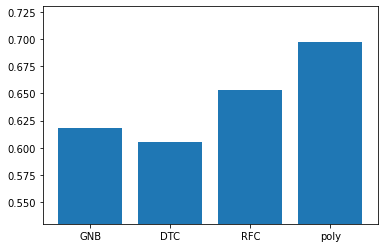

In [ ]:
a.append(np.amax(acc))
metodos = ['GNB', 'DTC', 'RFC', 'poly']
print(a)
plt.bar(metodos, a, width=0.8)
plt.ylim(0.53, 0.73)
plt.show()

## **Aplicando clasificación con redes neuronales**

**Segundo Tratamiento:** Tratamiento de los datos para implementar redes neuronales profundas (DNN) y convolucionales (CNN)

In [ ]:
# Numero de apariciones de cada clase
print(carros_dataset["class"].value_counts())
print("=====================")

# Se divide el dataFrame en dos
data = np.array(carros_dataset["image_path"])
data_y = np.array(carros_dataset["class"])

images = []
for dat in data:
  image = cv2.imread(dat)
  imagen1_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  res = resize(imagen1_gray, (70, 70))
  res = res.reshape(70,70,1)
  images.append(res)

0    545
1    500
Name: class, dtype: int64


In [42]:
images = np.array(images)

print("Numero de filas de imagenes: ", data.shape)
print("Numero de filas de las clases", data_y.shape)
print('Dimensiones del array de imagenes', images.shape)

Numero de filas de imagenes:  (1045,)
Numero de filas de las clases (1045,)
Dimensiones del array de imagenes (1045, 70, 70, 1)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(images, data_y, test_size = 0.2, random_state=21, shuffle=False)

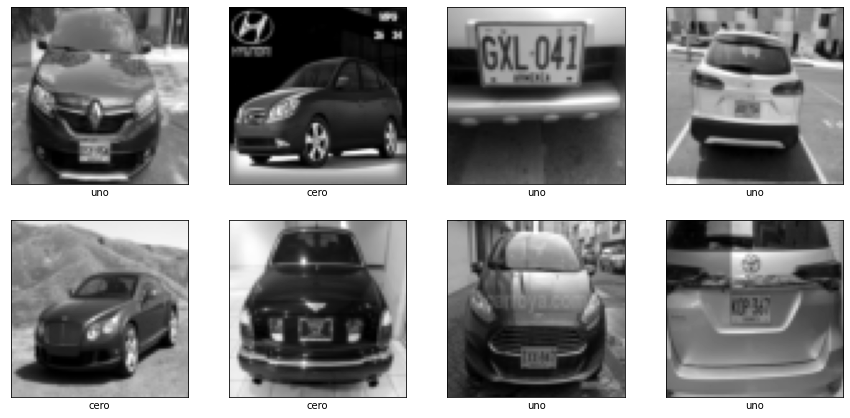

In [44]:
class_names = ['cero','uno']
plt.figure(figsize=(15,15))
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(70,70), cmap="gray")
    plt.xlabel(class_names[y_train[i]])

In [45]:
# Normalizar los datos (Pasar de 0-255 a 0-1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.
X_test = X_test / 255.

# **1. DNN** <a name="eje1"></a>

**Modelo 1 y 2**

In [46]:
#@title **Preparacion de los modelos**

# Se prepara el modelo 1
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(70, 70, 1)), # Capa inicial
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax) # Capa de salida
])

# Se prepara el modelo 2
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(70, 70, 1)), # Capa inicial
    tf.keras.layers.Dense(150, activation=tf.nn.relu),
    tf.keras.layers.Dense(150, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid) # Capa de salida
])

In [47]:
#@title **Compilacion del modelos**

# Compilacion del modelo 1
model1.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compilacion del modelo 2
model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
#@title **Entrenamiento del modelo 1**

historial1 = model1.fit(X_train, y_train,  epochs=80, batch_size=32) # Se entrena el modelo1

Epoch 1/80
27/27 [==============================] - 1s 4ms/step - loss: 0.6880 - accuracy: 0.5108
Epoch 2/80
27/27 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.5347
Epoch 3/80
27/27 [==============================] - 0s 5ms/step - loss: 0.6567 - accuracy: 0.6053
Epoch 4/80
27/27 [==============================] - 0s 5ms/step - loss: 0.6354 - accuracy: 0.6112
Epoch 5/80
27/27 [==============================] - 0s 4ms/step - loss: 0.6166 - accuracy: 0.6400
Epoch 6/80
27/27 [==============================] - 0s 4ms/step - loss: 0.6079 - accuracy: 0.6435
Epoch 7/80
27/27 [==============================] - 0s 5ms/step - loss: 0.6044 - accuracy: 0.6567
Epoch 8/80
27/27 [==============================] - 0s 5ms/step - loss: 0.5909 - accuracy: 0.6435
Epoch 9/80
27/27 [==============================] - 0s 4ms/step - loss: 0.5938 - accuracy: 0.6507
Epoch 10/80
27/27 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.6842
Epoch 11/80
27/27 [

In [49]:
#@title **Entrenamiento del modelo 2**

historial2 = model2.fit(X_train, y_train,  epochs=50, batch_size=32)

Epoch 1/50
27/27 [==============================] - 2s 14ms/step - loss: 0.6901 - accuracy: 0.5120
Epoch 2/50
27/27 [==============================] - 0s 15ms/step - loss: 0.6731 - accuracy: 0.5682
Epoch 3/50
27/27 [==============================] - 0s 18ms/step - loss: 0.6432 - accuracy: 0.6232
Epoch 4/50
27/27 [==============================] - 0s 17ms/step - loss: 0.6206 - accuracy: 0.6244
Epoch 5/50
27/27 [==============================] - 0s 16ms/step - loss: 0.6037 - accuracy: 0.6507
Epoch 6/50
27/27 [==============================] - 0s 15ms/step - loss: 0.5966 - accuracy: 0.6567
Epoch 7/50
27/27 [==============================] - 0s 12ms/step - loss: 0.5851 - accuracy: 0.6758
Epoch 8/50
27/27 [==============================] - 0s 14ms/step - loss: 0.5771 - accuracy: 0.6818
Epoch 9/50
27/27 [==============================] - 0s 14ms/step - loss: 0.5676 - accuracy: 0.6974
Epoch 10/50
27/27 [==============================] - 0s 14ms/step - loss: 0.5609 - accuracy: 0.7069
Epoch 11/

In [50]:
#@title **Grafica de la etapa de entrenamiento**
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial1.history["loss"])
plt.subplot(1,2,2)
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial2.history["loss"])

In [51]:
#@title **Perdida y accuracy fase testeo**

# Modelo 1
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

print("\n\n")
# Modelo 2
test_loss, test_acc = model2.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 5ms/step - loss: 0.7988 - accuracy: 0.6555
Test accuracy: 0.6555023789405823



7/7 [==============================] - 0s 5ms/step - loss: 0.7098 - accuracy: 0.6746
Test accuracy: 0.6746411323547363


In [52]:
#@title **Evaluando los metodos**

# Metodo 1
predictions = model1.predict(X_test)
print(predictions[7])
print("valor predicho:",  np.argmax(predictions[7]), "max prob: ", np.max(predictions[7]),
      "ground truth: ", y_test[7])

print("\n\n")
# Metodo 2
predictions = model2.predict(X_test)
print(predictions[17])
print("valor predicho:",  np.argmax(predictions[17]), "max prob: ", np.max(predictions[17]),
      "ground truth: ", y_test[17] )

[0.4631799  0.53682005]
valor predicho: 1 max prob:  0.53682005 ground truth:  1



[0.0022589]
valor predicho: 0 max prob:  0.0022588968 ground truth:  0


# **2. CNN** <a name="eje1"></a>

**Modelo 1 y 2**

In [53]:
#@title **Preparacion de los modelos**

# Se prepara el modelo 1
model_CNN2 =  tf.keras.models.Sequential()
model_CNN2.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(70, 70, 1)))
model_CNN2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN2.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_CNN2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN2.add(tf.keras.layers.Flatten())
model_CNN2.add(tf.keras.layers.Dense(64, activation='relu'))
model_CNN2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Se prepara el modelo 2
model_CNN3 =  tf.keras.models.Sequential()
model_CNN3.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(70, 70, 1)))
model_CNN3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN3.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN3.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_CNN3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN3.add(tf.keras.layers.Dropout(0.5))
model_CNN3.add(tf.keras.layers.Flatten())
model_CNN3.add(tf.keras.layers.Dense(64, activation='relu'))
model_CNN3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [54]:
#@title **Compilacion del modelos**

# Modelo 1
model_CNN2.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Modelo 2
model_CNN3.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
#@title **Entrenamiento del modelo 1**
historialCNN2 = model_CNN2.fit(X_train, y_train,  epochs=90, batch_size=32)

Epoch 1/90
27/27 [==============================] - 7s 234ms/step - loss: 0.6933 - accuracy: 0.5084
Epoch 2/90
27/27 [==============================] - 6s 229ms/step - loss: 0.6930 - accuracy: 0.5203
Epoch 3/90
27/27 [==============================] - 6s 231ms/step - loss: 0.6927 - accuracy: 0.5203
Epoch 4/90
27/27 [==============================] - 6s 227ms/step - loss: 0.6925 - accuracy: 0.5203
Epoch 5/90
27/27 [==============================] - 6s 228ms/step - loss: 0.6925 - accuracy: 0.5203
Epoch 6/90
27/27 [==============================] - 6s 229ms/step - loss: 0.6924 - accuracy: 0.5203
Epoch 7/90
27/27 [==============================] - 6s 227ms/step - loss: 0.6924 - accuracy: 0.5203
Epoch 8/90
27/27 [==============================] - 7s 258ms/step - loss: 0.6924 - accuracy: 0.5203
Epoch 9/90
27/27 [==============================] - 6s 226ms/step - loss: 0.6925 - accuracy: 0.5203
Epoch 10/90
27/27 [==============================] - 6s 228ms/step - loss: 0.6925 - accuracy: 0.5203

In [56]:
#@title **Entrenamiento del modelo 2**
historialCNN3 = model_CNN3.fit(X_train, y_train,  epochs=20, batch_size=32)

Epoch 1/20
27/27 [==============================] - 7s 238ms/step - loss: 0.6949 - accuracy: 0.5132
Epoch 2/20
27/27 [==============================] - 6s 232ms/step - loss: 0.6930 - accuracy: 0.5203
Epoch 3/20
27/27 [==============================] - 6s 232ms/step - loss: 0.6929 - accuracy: 0.5203
Epoch 4/20
27/27 [==============================] - 6s 233ms/step - loss: 0.6928 - accuracy: 0.5203
Epoch 5/20
27/27 [==============================] - 6s 240ms/step - loss: 0.6929 - accuracy: 0.5203
Epoch 6/20
27/27 [==============================] - 6s 228ms/step - loss: 0.6924 - accuracy: 0.5203
Epoch 7/20
27/27 [==============================] - 6s 232ms/step - loss: 0.6928 - accuracy: 0.5203
Epoch 8/20
27/27 [==============================] - 6s 238ms/step - loss: 0.6925 - accuracy: 0.5203
Epoch 9/20
27/27 [==============================] - 6s 235ms/step - loss: 0.6924 - accuracy: 0.5203
Epoch 10/20
27/27 [==============================] - 6s 233ms/step - loss: 0.6925 - accuracy: 0.5203

In [57]:
#@title **Grafica de la etapa de entrenamiento**
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historialCNN2.history["loss"])
plt.subplot(1,2,2)
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historialCNN3.history["loss"])

In [58]:
#@title **Perdida y accuracy fase testeo**

# Modelo 1
test_loss, test_acc = model_CNN2.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

print("\n\n")
# Modelo 2
test_loss, test_acc = model_CNN3.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

7/7 [==============================] - 1s 58ms/step - loss: 0.6918 - accuracy: 0.5263
Test accuracy: 0.5263158082962036



7/7 [==============================] - 1s 63ms/step - loss: 0.6918 - accuracy: 0.5263
Test accuracy: 0.5263158082962036


In [60]:
#@title **Evaluando los metodos**

# Modelo 1
predictions = model_CNN2.predict(X_test)
print(predictions[13])
print("valor predicho:",  np.argmax(predictions[13]), "max prob: ", np.max(predictions[13]),
      "ground truth: ", y_test[13] )

# Modelo 2
predictions = model_CNN3.predict(X_test)
print(predictions[13])
print("valor predicho:",  np.argmax(predictions[13]), "max prob: ", np.max(predictions[13]),
      "ground truth: ", y_test[13] )

[0.47748455]
valor predicho: 0 max prob:  0.47748455 ground truth:  1
[0.4774832]
valor predicho: 0 max prob:  0.4774832 ground truth:  1


# **Generando imagenes y trabajando con los mismos modelos** <a name="eje1"></a>

In [61]:
# Realizar el aumento de datos con varias transformaciones. Al final, graficar 10 como ejemplo
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X_train)

# Graficando las nuevas imagenes generadas
plt.figure(figsize=(20,8))
for imagen, etiqueta in datagen.flow(X_train, y_train, batch_size=10, shuffle=False):
  for i in range(8):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(70,70), cmap="gray")
  break

In [62]:
# Usar la funcion flow del generador para crear un iterador que podamos enviar como entrenamiento a la funcion FIT del modelo
data_gen_entrenamiento = datagen.flow(X_train, y_train, batch_size=32)

In [63]:
#@title **Preparacion de los modelos**

# Se prepara el modelo 1
model_CNN2_ad =  tf.keras.models.Sequential()
model_CNN2_ad.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(70, 70, 1)))
model_CNN2_ad.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN2_ad.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN2_ad.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN2_ad.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_CNN2_ad.add(tf.keras.layers.MaxPooling2D((2, 2)))
#model_CNN.add(tf.keras.layers.Dropout(0.5))
model_CNN2_ad.add(tf.keras.layers.Flatten())
model_CNN2_ad.add(tf.keras.layers.Dense(64, activation='relu'))
model_CNN2_ad.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Se prepara el modelo 2
model_CNN3_ad =  tf.keras.models.Sequential()
model_CNN3_ad.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(70, 70, 1)))
model_CNN3_ad.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN3_ad.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN3_ad.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN3_ad.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_CNN3_ad.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN3_ad.add(tf.keras.layers.Dropout(0.5))
model_CNN3_ad.add(tf.keras.layers.Flatten())
model_CNN3_ad.add(tf.keras.layers.Dense(64, activation='relu'))
model_CNN3_ad.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [64]:
#@title **Compilacion del modelos**

# Modelo 2
model_CNN2_ad.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Modelo 3
model_CNN3_ad.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [65]:
#@title **Entrenamiento del modelo 1**
historialCNN2_ad = model_CNN2_ad.fit(
    data_gen_entrenamiento,
    epochs=90, batch_size=32,
    validation_data=(X_test, y_test),
    steps_per_epoch=int(np.ceil(len(X_train) / float(32))),
    validation_steps=int(np.ceil(len(X_train) / float(32))),
)

Epoch 1/90
27/27 [==============================] - 8s 275ms/step - loss: 0.6930 - accuracy: 0.5179 - val_loss: 0.6922 - val_accuracy: 0.5263
Epoch 2/90
27/27 [==============================] - 7s 241ms/step - loss: 0.6928 - accuracy: 0.5203
Epoch 3/90
27/27 [==============================] - 7s 242ms/step - loss: 0.6935 - accuracy: 0.5203
Epoch 4/90
27/27 [==============================] - 6s 238ms/step - loss: 0.6930 - accuracy: 0.5203
Epoch 5/90
27/27 [==============================] - 6s 239ms/step - loss: 0.6929 - accuracy: 0.5203
Epoch 6/90
27/27 [==============================] - 6s 238ms/step - loss: 0.6929 - accuracy: 0.5203
Epoch 7/90
27/27 [==============================] - 6s 237ms/step - loss: 0.6927 - accuracy: 0.5203
Epoch 8/90
27/27 [==============================] - 6s 239ms/step - loss: 0.6927 - accuracy: 0.5203
Epoch 9/90
27/27 [==============================] - 6s 239ms/step - loss: 0.6926 - accuracy: 0.5203
Epoch 10/90
27/27 [==============================] - 7s 24

In [66]:
#@title **Entrenamiento del modelo 2**
historialCNN3_ad = model_CNN3_ad.fit(
    data_gen_entrenamiento,
    epochs=100, batch_size=32,
    validation_data=(X_test, y_test),
    steps_per_epoch=int(np.ceil(len(X_train) / float(32))),
    validation_steps=int(np.ceil(len(X_train) / float(32))),
)

Epoch 1/100
27/27 [==============================] - 8s 279ms/step - loss: 0.6956 - accuracy: 0.5120 - val_loss: 0.6920 - val_accuracy: 0.5263
Epoch 2/100
27/27 [==============================] - 7s 244ms/step - loss: 0.6935 - accuracy: 0.4653
Epoch 3/100
27/27 [==============================] - 7s 242ms/step - loss: 0.6931 - accuracy: 0.5203
Epoch 4/100
27/27 [==============================] - 7s 243ms/step - loss: 0.6931 - accuracy: 0.5203
Epoch 5/100
27/27 [==============================] - 7s 243ms/step - loss: 0.6929 - accuracy: 0.5203
Epoch 6/100
27/27 [==============================] - 7s 244ms/step - loss: 0.6929 - accuracy: 0.5203
Epoch 7/100
27/27 [==============================] - 7s 243ms/step - loss: 0.6929 - accuracy: 0.5203
Epoch 8/100
27/27 [==============================] - 7s 240ms/step - loss: 0.6927 - accuracy: 0.5203
Epoch 9/100
27/27 [==============================] - 7s 241ms/step - loss: 0.6925 - accuracy: 0.5203
Epoch 10/100
27/27 [=============================

In [68]:
#@title **Grafica de la etapa de entrenamiento**
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historialCNN2_ad.history["loss"])
plt.subplot(1,2,2)
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historialCNN3_ad.history["loss"])

In [69]:
#@title **Perdida y accuracy fase testeo**

# Modelo 1
test_loss, test_acc = model_CNN2_ad.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

print("\n\n")
# Modelo 2
test_loss, test_acc = model_CNN3_ad.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 60ms/step - loss: 0.6919 - accuracy: 0.5263
Test accuracy: 0.5263158082962036



7/7 [==============================] - 0s 61ms/step - loss: 0.6918 - accuracy: 0.5263
Test accuracy: 0.5263158082962036


In [70]:
#@title **Evaluando los metodos**

# Modelo 1
predictions = model_CNN2_ad.predict(X_test)
print(predictions[7])
print("valor predicho:",  np.argmax(predictions[7]), "max prob: ", np.max(predictions[7]),
      "ground truth: ", y_test[7] )

# Modelo 2
predictions = model_CNN3_ad.predict(X_test)
print(predictions[7])
print("valor predicho:",  np.argmax(predictions[7]), "max prob: ", np.max(predictions[7]),
      "ground truth: ", y_test[7] )

[0.480903]
valor predicho: 0 max prob:  0.480903 ground truth:  1
[0.47907192]
valor predicho: 0 max prob:  0.47907192 ground truth:  1
